## Purpose of Notebook

The speed constraints in Simulation seem to not be working properly. Whenever we run our simulation, we get output speeds that are significantly higher than what we expect, leading us to believe that the speeds are not being properly constrained. I have determined that the root issue is how the speed limits are being calculated, and that the process of enforcing the constraints is working fine. Now that we have data from competition telling us the speed of the car at different points in the track, we can impose realistic constraints without any need to estimate them. In this notebook, I will find the maximal speeds at every point in the track, and set these speeds as the speed limits used in Simulation.

## Creating Client & Imports

In [1]:
from data_tools.collections.time_series import TimeSeries
from data_tools.query.influxdb_query import DBClient
from data_tools.influxdb.fsgp_2024_laps import FSGPDayLaps

# CLIENT
client = DBClient()

# SETTING DAY
day_num = 1
day = FSGPDayLaps(day_num)

ERROR:data_tools.query.postgresql_query:Could not find a POSTGRESQL_USERNAME in .env!
ERROR:data_tools.query.postgresql_query:Could not find a POSTGRESQL_PASSWORD in .env!
ERROR:data_tools.query.postgresql_query:Could not find a POSTGRESQL_DATABASE in .env!
ERROR:data_tools.query.postgresql_query:Could not find a POSTGRESQL_ADDRESS in .env!


Creating client with API Token: s4Z9_S6_O09kDzYn1KZcs7LVoCA2cVK9_ObY44vR4xMh-wYLSWBkypS0S0ZHQgBvEV2A5LgvQ1IKr8byHes2LA==
Creating client with Org: 8a0b66d77a331e96


## Coordinates

In [2]:
# Importing Coordinates

reverse_coords = [[ 37.00107373, -86.36854755],
    [ 37.0011529 , -86.36837867],
    [ 37.00122817, -86.3682181 ],
    [ 37.00133071, -86.36801267],
    [ 37.00143614, -86.36779264],
    [ 37.00152389, -86.3675912 ],
    [ 37.00160574, -86.36740819],
    [ 37.00167596, -86.36725066],
    [ 37.00175285, -86.36709064],
    [ 37.00183166, -86.36691875],
    [ 37.00192538, -86.36670617],
    [ 37.00200136, -86.36653034],
    [ 37.00208623, -86.36635086],
    [ 37.00215644, -86.36619701],
    [ 37.00222549, -86.36603626],
    [ 37.00229839, -86.3658645 ],
    [ 37.00237732, -86.36569622],
    [ 37.00245038, -86.36553914],
    [ 37.00252912, -86.36537128],
    [ 37.00259904, -86.36521818],
    [ 37.00266755, -86.36507091],
    [ 37.00274639, -86.36490341],
    [ 37.00283342, -86.36471029],
    [ 37.00291248, -86.36454704],
    [ 37.00298517, -86.36439075],
    [ 37.0030636 , -86.36423803],
    [ 37.00313338, -86.36408574],
    [ 37.00320937, -86.36393701],
    [ 37.00330797, -86.36377724],
    [ 37.00343811, -86.36368662],
    [ 37.00357758, -86.36365019],
    [ 37.00372489, -86.36360692],
    [ 37.00388711, -86.36356354],
    [ 37.00405472, -86.36352621],
    [ 37.00423763, -86.36348621],
    [ 37.00437129, -86.36338074],
    [ 37.00448184, -86.36323899],
    [ 37.00457515, -86.36307953],
    [ 37.0047012 , -86.36286956],
    [ 37.00486024, -86.36273924],
    [ 37.00505061, -86.36270756],
    [ 37.00527945, -86.36272947],
    [ 37.00548802, -86.36263566],
    [ 37.00565341, -86.36245496],
    [ 37.00573513, -86.3621647 ],
    [ 37.00568611, -86.36182869],
    [ 37.00548782, -86.36157939],
    [ 37.0052881 , -86.36149696],
    [ 37.00511652, -86.36149669],
    [ 37.0049746 , -86.36158761],
    [ 37.00485989, -86.3616726 ],
    [ 37.00469955, -86.3617696 ],
    [ 37.00451492, -86.36178471],
    [ 37.00435852, -86.36173599],
    [ 37.00419576, -86.36162316],
    [ 37.00409127, -86.36146652],
    [ 37.00404463, -86.3612301 ],
    [ 37.00407232, -86.36097832],
    [ 37.00415922, -86.36078578],
    [ 37.00426711, -86.36066944],
    [ 37.00439509, -86.36060407],
    [ 37.00452844, -86.36057503],
    [ 37.00466778, -86.36054604],
    [ 37.004833  , -86.36050987],
    [ 37.00499495, -86.36047743],
    [ 37.00514229, -86.36044484],
    [ 37.00524902, -86.36041601],
    [ 37.00541074, -86.36037856],
    [ 37.00558676, -86.36034575],
    [ 37.00578957, -86.36038183],
    [ 37.00596102, -86.36045445],
    [ 37.00607154, -86.36065091],
    [ 37.0061651 , -86.36090615],
    [ 37.00626234, -86.3611639 ],
    [ 37.00637312, -86.36147776],
    [ 37.00642557, -86.36179897],
    [ 37.00644459, -86.36216748],
    [ 37.00637929, -86.36250433],
    [ 37.00629836, -86.36273906],
    [ 37.00622229, -86.36291634],
    [ 37.00611158, -86.36309997],
    [ 37.00600738, -86.36323379],
    [ 37.00589169, -86.3633461 ],
    [ 37.00576471, -86.36344689],
    [ 37.00564905, -86.36353398],
    [ 37.00551878, -86.36359932],
    [ 37.00537978, -86.36365448],
    [ 37.00525188, -86.36370605],
    [ 37.0051236 , -86.36376501],
    [ 37.00497727, -86.36382802],
    [ 37.00484855, -86.36391978],
    [ 37.00471266, -86.36403361],
    [ 37.0045783 , -86.36422396],
    [ 37.00447907, -86.36439954],
    [ 37.00435695, -86.36453807],
    [ 37.00424813, -86.36465022],
    [ 37.00411061, -86.36480228],
    [ 37.00397977, -86.36492984],
    [ 37.0038682 , -86.36504946],
    [ 37.00376295, -86.36516126],
    [ 37.00365436, -86.36527329],
    [ 37.00354759, -86.36539144],
    [ 37.00341675, -86.36552332],
    [ 37.00329206, -86.3656715 ],
    [ 37.00316095, -86.36581567],
    [ 37.00303256, -86.36594441],
    [ 37.00291203, -86.36607157],
    [ 37.00278014, -86.36622802],
    [ 37.00269333, -86.36641303],
    [ 37.00260606, -86.36659437],
    [ 37.00252845, -86.36675984],
    [ 37.00243487, -86.36695271],
    [ 37.00234795, -86.36716654],
    [ 37.00226102, -86.36735999],
    [ 37.00218046, -86.36754144],
    [ 37.00210026, -86.36771854],
    [ 37.00202358, -86.36787901],
    [ 37.00194406, -86.36806693],
    [ 37.00185835, -86.36825428],
    [ 37.00177578, -86.36843604],
    [ 37.00169902, -86.36860048],
    [ 37.0016732 , -86.3687928 ],
    [ 37.001679  , -86.3689974 ],
    [ 37.00168488, -86.36919051],
    [ 37.00169122, -86.36938766],
    [ 37.00169469, -86.3695562 ],
    [ 37.00170118, -86.36974238],
    [ 37.00171055, -86.36993991],
    [ 37.00167198, -86.37010864],
    [ 37.00158558, -86.37021273],
    [ 37.00148934, -86.37030898],
    [ 37.00139295, -86.37041757],
    [ 37.00129011, -86.37051816],
    [ 37.00120286, -86.37061913],
    [ 37.00112253, -86.37073184],
    [ 37.00106144, -86.37085264],
    [ 37.00099678, -86.37100197],
    [ 37.00092255, -86.37116696],
    [ 37.00083249, -86.37137665],
    [ 37.00073506, -86.37159438],
    [ 37.00065426, -86.37177611],
    [ 37.00057398, -86.37196168],
    [ 37.00060097, -86.37214635],
    [ 37.00074272, -86.37221467],
    [ 37.0009059 , -86.37222018],
    [ 37.00107657, -86.37218846],
    [ 37.00122503, -86.37211976],
    [ 37.00133803, -86.37204677],
    [ 37.00145467, -86.37192099],
    [ 37.00156457, -86.37178347],
    [ 37.00167114, -86.37162599],
    [ 37.00176434, -86.37145299],
    [ 37.00183833, -86.37126821],
    [ 37.00188646, -86.37112396],
    [ 37.0019441 , -86.37095574],
    [ 37.00197296, -86.370787  ],
    [ 37.00202945, -86.37067751],
    [ 37.00209668, -86.37048098],
    [ 37.00218305, -86.37031655],
    [ 37.00228558, -86.37016005],
    [ 37.00238818, -86.37002764],
    [ 37.00249377, -86.36991909],
    [ 37.00259639, -86.36983868],
    [ 37.00270864, -86.36976266],
    [ 37.00281411, -86.3697033 ],
    [ 37.00292264, -86.36964769],
    [ 37.00303847, -86.369599  ],
    [ 37.00316942, -86.36952703],
    [ 37.00332578, -86.36939126],
    [ 37.00342743, -86.36921198],
    [ 37.00346211, -86.36901195],
    [ 37.00343231, -86.36879509],
    [ 37.00336736, -86.36861758],
    [ 37.00327983, -86.36847602],
    [ 37.00316589, -86.36828932],
    [ 37.00305696, -86.36810259],
    [ 37.00296937, -86.36793662],
    [ 37.00293802, -86.36773416],
    [ 37.00295792, -86.36753614],
    [ 37.00301643, -86.36739089],
    [ 37.00307192, -86.36724611],
    [ 37.00312788, -86.36711056],
    [ 37.00320856, -86.36698638],
    [ 37.00331523, -86.36684361],
    [ 37.00340519, -86.36672019],
    [ 37.00350264, -86.36658791],
    [ 37.00361135, -86.36649982],
    [ 37.00374245, -86.36645177],
    [ 37.00387034, -86.3664758 ],
    [ 37.00395668, -86.36655587],
    [ 37.00402368, -86.36670753],
    [ 37.00407807, -86.36686779],
    [ 37.00412607, -86.36701603],
    [ 37.00418686, -86.36718831],
    [ 37.00427315, -86.36742386],
    [ 37.00436296, -86.3676927 ],
    [ 37.00442144, -86.36790543],
    [ 37.00445858, -86.36815496],
    [ 37.00447715, -86.36847342],
    [ 37.00444541, -86.36882644],
    [ 37.00434238, -86.36911386],
    [ 37.00425654, -86.36927291],
    [ 37.00418289, -86.36939303],
    [ 37.00410293, -86.36950912],
    [ 37.00399731, -86.36962489],
    [ 37.00390147, -86.36973254],
    [ 37.00379293, -86.36984054],
    [ 37.00369701, -86.36994104],
    [ 37.00359474, -86.37004514],
    [ 37.0034838 , -86.3701598 ],
    [ 37.00338477, -86.37024376],
    [ 37.00327609, -86.37032788],
    [ 37.00318982, -86.37040789],
    [ 37.00306205, -86.37049992],
    [ 37.00294389, -86.37059192],
    [ 37.00283177, -86.37070006],
    [ 37.00272312, -86.37083897],
    [ 37.00264003, -86.37094293],
    [ 37.00255683, -86.37103895],
    [ 37.00249914, -86.37115127],
    [ 37.00243497, -86.37126771],
    [ 37.00236746, -86.3713964 ],
    [ 37.00230001, -86.37152106],
    [ 37.00223561, -86.37164596],
    [ 37.00217132, -86.37175865],
    [ 37.0021135 , -86.37187932],
    [ 37.00204601, -86.37200003],
    [ 37.00196791, -86.37211434],
    [ 37.00188761, -86.3722312 ],
    [ 37.00180726, -86.37233202],
    [ 37.00173651, -86.37241676],
    [ 37.00165284, -86.37250555],
    [ 37.00155067, -86.3726109 ],
    [ 37.00144762, -86.37271211],
    [ 37.00136704, -86.37279282],
    [ 37.00126713, -86.37288565],
    [ 37.00115123, -86.37299929],
    [ 37.00103518, -86.37310829],
    [ 37.0009191 , -86.37321738],
    [ 37.00082561, -86.37329809],
    [ 37.00072863, -86.37339546],
    [ 37.00061364, -86.37350099],
    [ 37.00051698, -86.37360214],
    [ 37.00042667, -86.37368311],
    [ 37.00032338, -86.37378434],
    [ 37.00022342, -86.37387665],
    [ 37.00012018, -86.3739737 ],
    [ 37.00002051, -86.37405916],
    [ 36.99991404, -86.37415222],
    [ 36.99981076, -86.37423248],
    [ 36.99970432, -86.37430523],
    [ 36.99958169, -86.37432571],
    [ 36.99946928, -86.37430399],
    [ 36.99934964, -86.37428072],
    [ 36.99922365, -86.37425686],
    [ 36.99908793, -86.37422888],
    [ 36.99899069, -86.37413638],
    [ 36.99896465, -86.37397888],
    [ 36.9989808 , -86.37380904],
    [ 36.99900664, -86.37362303],
    [ 36.99904589, -86.37342887],
    [ 36.9990885 , -86.37323096],
    [ 36.99912743, -86.3730292 ],
    [ 36.99916641, -86.37284378],
    [ 36.99921127, -86.37261758],
    [ 36.99924349, -86.37245211],
    [ 36.99932082, -86.37230251],
    [ 36.99932082, -86.37230251],
    [ 36.99940337, -86.37214797],
    [ 36.99948814, -86.37199725],
    [ 36.99958754, -86.37189043],
    [ 36.99970528, -86.37178738],
    [ 36.99982625, -86.37169183],
    [ 36.99997073, -86.37159181],
    [ 37.00011471, -86.3714889 ],
    [ 37.00027357, -86.37138907],
    [ 37.0003852 , -86.37123775],
    [ 37.00042033, -86.37099884],
    [ 37.00038811, -86.3707825 ],
    [ 37.00031195, -86.37062837],
    [ 37.00026491, -86.37041498],
    [ 37.00030254, -86.37020247],
    [ 37.00038472, -86.3700261 ],
    [ 37.0004699 , -86.36984594],
    [ 37.00056383, -86.36964375],
    [ 37.00064015, -86.3694857 ],
    [ 37.00070993, -86.36934481],
    [ 37.0008098 , -86.36912411],
    [ 37.00090662, -86.36891836],
    [ 37.00098578, -86.36874579],
    [ 37.00107373, -86.36854755]
  ]

coords = reverse_coords[::-1] # coordinates in the correct order; starting coordinate goes first

## GIS Object

In [3]:
from physics.environment.gis.gis import GIS
from physics.environment.gis.gis import calculate_path_distances
import numpy as np

# Defining dictionary "route_data"

total_track_length = 5033.62413471853 # m

route_data = {
    "path" : coords,
    "elevations" : np.zeros(len(coords)),
    "time_zones" : np.zeros(len(coords)),
    "num_unique_coords" : (len(coords) - 1) }

# Creating GIS object

starting_coords = [37.00107373, -86.36854755]

gis = GIS(route_data, starting_coords, current_coord = starting_coords)

## Defining Functions

In [4]:
from scipy import integrate as intg
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone


# Calculates the distance covered in a given TimeSeries velocity array. It can either return the value or print the information
def distance_covered(vel: TimeSeries, expected: int = 3.2, save = False):
    dist_m = intg.simpson(vel) # integrate to find distance in m
    distance_mi = dist_m/(1609.344) # convert to miles
    if save:
        return distance_mi
    else:
        print(f"Distance is {distance_mi:.2f} mi. Expected is 3.2 mi.")
        print(f"Difference with expected is {distance_mi-3.2:.4f} mi")

# Calculates the net distance covered in a specified lap number
def distance_covered_lap(lap_num: int):
    start = day.get_start_utc(lap_num)
    stop = day.get_finish_utc(lap_num)
    start_time = datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    end_time = datetime.strptime(stop, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    vel: TimeSeries = client.query_time_series(start_time, end_time, "VehicleVelocity", granularity = 1,  units="m/s")
    dist_m = intg.simpson(vel) # distance in meters
    return dist_m

# Once you already have a lap number and a velocity array, it calculates the distance you have covered
def distance_so_far(start: datetime, stop: datetime, vel_lap: TimeSeries):
    difference = int(stop.timestamp() - start.timestamp())
    if difference == len(vel_lap):
        vel = vel_lap
    else:
        vel = vel_lap[0: difference]
    dist_m = intg.simpson(vel)
    return dist_m

# Once you specify the day and lap, returns the indices of the coordinates covered
def get_indices(lap: int, day: int):
    start = day.get_start_utc(lap) 
    end = day.get_finish_utc(lap)
    start_time = datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    end_time = datetime.strptime(end, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    velocity = client.query_time_series(start_time, end_time, "VehicleVelocity", granularity = 1,  units="m/s")
    total_lap_distance = intg.simpson(velocity)
    distances = np.zeros(len(velocity))
    for i in range(len(velocity)):
        end = start_time + timedelta(seconds=i+1)  # i+1 to match your second increment logic
        distance = distance_so_far(start_time, end, velocity)
        distance_proportion = (distance / total_lap_distance) * total_track_length
        distances[i] = distance_proportion
        
    indices = np.zeros(len(distances), dtype = int)
    for i in range(len(distances)):
        indices[i] = gis.calculate_closest_gis_indices(np.array(distances[i]))[0]

    return indices

# Once you specify the day and lap, returns the corresponding speed array
def get_speeds(lap:int, day:int):
    start = day.get_start_utc(lap) 
    end = day.get_finish_utc(lap)
    start_time = datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    end_time = datetime.strptime(end, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=timezone.utc)
    
    return client.query_time_series(start_time, end_time, "VehicleVelocity", granularity = 1,  units="m/s")
    
    

## Finding Max Speed at Every Coordinate

The strategy here is as follows: I have a the speed of our car at every point during the race. I also know where the car was at every point during the race. I want to find the maximum speed achieved at every location, which will allow me to impose better speed limits. First, I will get all of the coordinates that were crossed during Day 1 and Day 3. I will then find the speed at each of those coordinates, and create a dictionary of coordinates and speeds that only keeps the highest value of the speed corresponding to a specific coordinate.

### Getting Coordinates

For information about where the coordinates come from, see documentation on Localize FSGP Data. 

In [5]:
coords_day1 = np.load('coords_day1.npy')
coords_day3 = np.load('coords_day3.npy')

### Getting Speeds - Day 1

In [6]:
# Constants
day_num = 1
day = FSGPDayLaps(day_num)
num_laps = day.get_lap_count()

In [7]:
speeds_day1 = []
for i in range(num_laps):
    if (i+1)==28:
        nan_speeds = [np.nan] * 1065
        speeds_day1.extend(nan_speeds)
        continue
    elif (i+1) == 29:
        continue
    elif (i+1) ==32:
        nan_speeds = [np.nan] * 1417
        speeds_day1.extend(nan_speeds)
        continue
    elif (i+1) == 33:
        continue
    else:
        speeds_day1.extend(get_speeds(i+1, day))

### Getting Speeds - Day 3

In [8]:
# Constants
day_num = 3
day = FSGPDayLaps(day_num)
num_laps = day.get_lap_count()

In [9]:
speeds_day3 = []
for i in range(num_laps):
    if (i+1)==26:
        nan_speeds = [np.nan] * 1343
        speeds_day3.extend(nan_speeds)
    elif (i+1) == 27:
        continue
    elif (i+1) ==46:
        nan_speeds = [np.nan] * 2256
        speeds_day3.extend(nan_speeds)
    elif (i+1) == 47:
        continue
    else:
        speeds_day3.extend(get_speeds(i+1, day))

A clarification I would like to make, is that the reason why I set some of the speeds to be nan is so that the speed arrays match the coordinate arrays. To be more clear, during the race there were some laps where we pitted, laps at which it was difficult/not very useful to estimate the car's location. To indicate that the data during that time period should not be used, I decided to set the values of the coordinate arrays at those times to be nan.

## Dictionary of Maximum Speeds

Now that I have all of the coordinates, and all of the speeds, I proceed to create the dictionary that keeps the information of the maximal speed at every coordinate in the track.

In [10]:
import numpy as np

#Function to create the dictionary
def max_velocity_per_coordinate(coordinates, velocities):
    # Dictionary to store the maximum velocity for each coordinate
    max_velocity_map = {}

    # Iterate over coordinates and corresponding velocities
    for coord, vel in zip(coordinates, velocities):
        # Skip if the velocity is NaN or if any element of the coordinate is NaN
        if np.isnan(vel) or np.any(np.isnan(coord)):
            continue

        # Convert the coordinate to a tuple (hashable)
        coord_tuple = tuple(coord)

        if coord_tuple in max_velocity_map:
            # Update the maximum velocity if the current velocity is greater
            max_velocity_map[coord_tuple] = max(max_velocity_map[coord_tuple], vel)
        else:
            # Add the coordinate with the current velocity
            max_velocity_map[coord_tuple] = vel

    return max_velocity_map

# Creating arrays of all the coordinates and speeds of Day 1 and Day 3
total_coords = np.concatenate((coords_day1, coords_day3))
total_speeds = np.concatenate((speeds_day1, speeds_day3))

# Creating the dictionary
result = max_velocity_per_coordinate(total_coords, total_speeds)


In [11]:
# Making the result easier to visualize

cleaned_result = {
    tuple(map(float, key)): float(value)
    for key, value in result.items()
}

## Creating Speed Limits

To give some context, the way the speed limits work in Simulation is as follows: instead of having a speed limit array where each point corresponds to a coordinate, we have a very long array that gets repeated multiple times. This is because the constrain_speed_limits Rust function uses the distance as some form of indexing, so it essentially constrains the speed for the entire race (which has a great number of laps) at once. As such, you need to have a very long array, one that has enough speed limits to cover every lap in the race. To give a bit of a visualization, imagine your speed limits for a single lap were these [2, 3, 4]. If you were projecting to race for 3 laps, then the array you would create is this one [2, 3, 4, 2, 3, 4, 2, 3, 4]. Hopefully now some of the things I proceed to do make more sense.

In [12]:
# Grabbing all the maximum speeds, not in order

speed_limit_array = [cleaned_result[coord] for coord in cleaned_result.keys()]

# I want to have the speed limits in order. That is, the speed limit corresponding to the start coordinate goes first, and so on.

ordered_speed_limit_array_meters = speed_limit_array[21:] + speed_limit_array[:21]

ordered_speed_limit_array_kms = [x * 3.6 for x in ordered_speed_limit_array_meters] # transforming from m/s to km/hr in entire array

In [13]:
# Saving arrays as npz

np.savez('fixed_speed_constraints.npz', data=ordered_speed_limit_array_kms)


# I saved the array with wrong units for the purpose of trying out some smaller speed limits to see how the speeds got constrained 
# np.savez('fixed_speed_constraints_wrong_units.npz', data=ordered_speed_limit_array_meters)

In [14]:
## Downloading the Speed Limit Array

In [15]:
from IPython.display import FileLink
FileLink(r'fixed_speed_constraints.npz')

C:\Users\mikel\data_analysis\fixed_speed_constraints.npz

In [16]:
# FileLink(r'fixed_speed_constraints_wrong_units.npz')

## Speed Heat Map

Over here I just create a speed heat map where I show what the maximum speed achieved was at every point of the track. This serves as a bit of a sanity check to make sure that the values I used make sense.

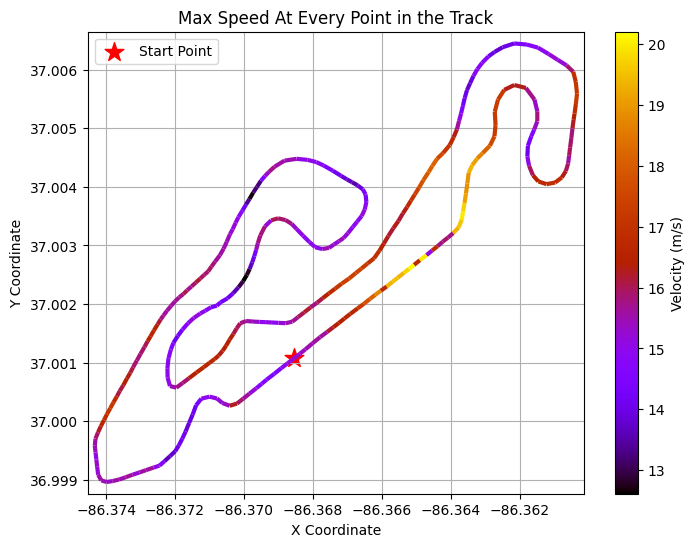

In [17]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Separating the coordinates into x and y components
x_coords = [coord[1] for coord in coords]
y_coords = [coord[0] for coord in coords]

# Create an array of points from the coordinates
points = np.array([x_coords, y_coords]).T.reshape(-1, 1, 2)

# Create segments by connecting the points
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Normalize the velocity values for the color map
norm = plt.Normalize(min(ordered_speed_limit_array_meters), max(ordered_speed_limit_array_meters))

# Create a LineCollection, where each segment is colored based on the velocity
lc = LineCollection(segments, cmap='gnuplot', norm=norm, linewidth=3)

# Set the color of each segment based on the velocity values
lc.set_array(np.array(ordered_speed_limit_array_meters))

# Create a plot
plt.figure(figsize=(8, 6))
plt.gca().add_collection(lc)
plt.plot(x_coords, y_coords, linestyle='None')  # Plot points without connecting them
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

# Add a color bar to show the velocity scale
plt.colorbar(lc, label='Velocity (m/s)')

# Add labels, grid, and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Max Speed At Every Point in the Track')
plt.grid(True)


# Adjust the axis limits to fit the track
plt.xlim(min(x_coords) - 0.0002, max(x_coords) + 0.0002)
plt.ylim(min(y_coords) - 0.0002, max(y_coords) + 0.0002)

# Optionally, highlight the starting point
plt.scatter(x_coords[0], y_coords[0], color='red', s=200, marker='*', label='Start Point')

# Add a legend and show the plot
plt.legend()
plt.show()